In [1]:
from ipywidgets import Controller
from pythreejs import *
import numpy as np
from IPython.display import display
from ipywidgets import HTML, Text
from traitlets import link, dlink
import rasterio
from rasterio.plot import show

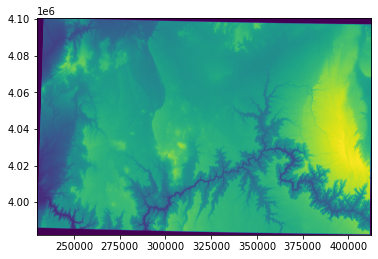

<AxesSubplot:>

In [2]:
ds = rasterio.open('gc_dem.tif')
show(ds)

In [3]:
ar = ds.read(1)
ar = ar[::10, ::10]
ar = ar[50:150, 50:150]
view_width = 600
view_height = 600
nx, ny = (100, 100)
z = ar
xmax = 10 * 10 / 2
z = z.astype(float) - np.mean(z)
z = z / 100
z

array([[-4.23137e+00, -3.65137e+00, -3.70137e+00, ..., -7.01370e-01,
        -7.91370e-01, -1.49137e+00],
       [-2.86137e+00, -2.54137e+00, -2.63137e+00, ..., -8.41370e-01,
        -9.81370e-01, -1.65137e+00],
       [-3.70137e+00, -1.84137e+00, -8.01370e-01, ..., -1.11137e+00,
        -9.61370e-01, -1.70137e+00],
       ...,
       [-1.95137e+00, -1.77137e+00, -2.10137e+00, ..., -7.13700e-02,
        -5.13700e-02,  7.86300e-02],
       [-1.92137e+00, -1.91137e+00, -2.03137e+00, ..., -4.13700e-02,
        -1.37000e-03,  1.08630e-01],
       [-2.04137e+00, -2.14137e+00, -1.83137e+00, ...,  5.86300e-02,
         3.86300e-02,  1.28630e-01]])

In [4]:
# view_width = 600
# view_height = 200
# nx, ny = (20, 20)
# xmax=1
# x = np.linspace(-xmax, xmax, nx)
# y = np.linspace(-xmax, xmax, ny)
# xx, yy = np.meshgrid(x, y)
# z = xx ** 3 - yy ** 2

In [5]:
# Generate scene objects from data:
surf_g = SurfaceGeometry(z=list(z[::-1].flat), 
                         width=2 * xmax,
                         height=2 * xmax,
                         width_segments=nx - 1,
                         height_segments=ny - 1)

# surf_g = SurfaceGeometry(z=list(z[::-1].flat), 
#                          width_segments=nx - 1,
#                          height_segments=ny - 1)

surf = Mesh(geometry=surf_g,
            material=MeshLambertMaterial(map=height_texture(z[::-1], 'YlGnBu_r')))

surfgrid = SurfaceGrid(geometry=surf_g, material=LineBasicMaterial(color='black'),
                       position=[0, 0, 1e-2])  # Avoid overlap by lifting grid slightly

# Set up picking bojects:
# hover_point = Mesh(geometry=SphereGeometry(radius=0.05),
#                    material=MeshLambertMaterial(color='hotpink'))

# click_picker = Picker(controlling=surf, event='dblclick')
# hover_picker = Picker(controlling=surf, event='mousemove')

# Set up scene:
key_light = DirectionalLight(color='white', position=[3, 5, 10], intensity=0.4)
c = PerspectiveCamera(position=[1, 3, 20], up=[0, 0, 3], aspect=view_width / view_height,
                      children=[key_light])

# c = OrthographicCamera(position=[0, 3, 3], up=[0, 0, 1], aspect=view_width / view_height,
#                       children=[key_light])

# scene = Scene(children=[surf, c, surfgrid, hover_point, AmbientLight(intensity=0.8)])
scene = Scene(children=[surf, c, surfgrid, AmbientLight(intensity=0.8)])

# renderer = Renderer(camera=c, scene=scene,
#                     width=view_width, height=view_height,
#                     controls=[OrbitControls(controlling=c), click_picker, hover_picker])

# orb_ctrl = OrbitControls(controlling=c, enableZoom=False)

orb_ctrl = OrbitControls(controlling=c)

# orb_ctrl = FlyControls(controlling=c)

renderer = Renderer(camera=c, scene=scene,
                    width=view_width, height=view_height,
                    controls=[orb_ctrl])

In [6]:
# orb_ctrl.enableZoom = False

In [7]:
renderer

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.4, matrixWorldNeedsUpd…

In [8]:
orb_ctrl.traits()

{'_display_callbacks': <traitlets.traitlets.Instance at 0x7f0154b289a0>,
 '_model_module': <traitlets.traitlets.Unicode at 0x7f00dbf1b490>,
 '_model_module_version': <traitlets.traitlets.Unicode at 0x7f00dbf1b4c0>,
 '_model_name': <traitlets.traitlets.Unicode at 0x7f00dbe58670>,
 '_msg_callbacks': <traitlets.traitlets.Instance at 0x7f0154b28a30>,
 '_property_lock': <traitlets.traitlets.Dict at 0x7f0154b28940>,
 '_states_to_send': <traitlets.traitlets.Set at 0x7f0154b28970>,
 '_view_count': <traitlets.traitlets.Int at 0x7f0154b28820>,
 '_view_module': <traitlets.traitlets.Unicode at 0x7f0154b28790>,
 '_view_module_version': <traitlets.traitlets.Unicode at 0x7f0154b287c0>,
 '_view_name': <traitlets.traitlets.Unicode at 0x7f0154b28760>,
 'autoRotate': <traitlets.traitlets.Bool at 0x7f00dbe586a0>,
 'autoRotateSpeed': <traitlets.traitlets.CFloat at 0x7f00dbe58700>,
 'comm': <traitlets.traitlets.Instance at 0x7f0154b28850>,
 'controlling': <traitlets.traitlets.Instance at 0x7f00dbe4aca0>,
 '

In [9]:
pad = Controller()
pad

Controller()

In [10]:
factor = 10
def affine(constant, factor):
    return lambda x: constant + factor * x

pad.links = []

def setup():
    if pad.connected:
        # pass
        # pad.links.append(dlink((pad.buttons[3], 'value'), (orb_ctrl, 'enableZoom'), lambda x: bool(x)))
        pad.links.append(dlink((pad.axes[1], 'value'), (orb_ctrl, 'enableZoom'), lambda x: x < 0))
        # pad.links.append(dlink((pad.axes[1], 'value'), (c, 'position1'), affine(0.0, factor)))
        # pad.links.append(dlink((pad.axes[0], 'value'), (orb_ctrl, 'roll'), affine(0.0, -factor)))
        # pad.links.append(dlink((pad.axes[3], 'value'), (orb_ctrl, 'forward_speed'), affine(0.0, 2 * factor)))
        # pad.links.append(dlink((pad.axes[2], 'value'), (orb_ctrl, 'yaw'), affine(0.0, factor)))
    if not pad.connected:
        for l in pad.links:
            l.unlink()
        pad.links = []

pad.observe(setup, names=['connected'])
setup()

In [12]:
pad.axes[1].value

-0.04657124727964401